# [Ravi Raghavan]
# Netflix Stock Prices Notebook
---

# Preamble

In [411]:
# import relevant Python libraries
###
import numpy as np  #import numpy 
import pandas as pd #import pandas
from scipy import stats as sps  #import stats from scipy
from matplotlib import pyplot as plt    #import pyplot from matplotlib
from mpl_toolkits.mplot3d import Axes3D #import Axes3D from mpl_toolkits.mplot3d
from IPython.display import display, Latex  #import display and Latex from IPython.display
import seaborn as sns
from sklearn import preprocessing as sklpp
from sklearn import decomposition as skldecomp 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
###

# **1. Brief Exploration of Dataset**

In [412]:
netflix_stock_prices = pd.read_csv("NFLX.csv") #read in netflix stock prices into pandas dataframe 
print(netflix_stock_prices.head(10)) #display first two rows of dataframe just to get a feel for what the dataframe contains 

         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
5  2018-02-12  252.139999  259.149994  249.000000  257.950012  257.950012   
6  2018-02-13  257.290009  261.410004  254.699997  258.269989  258.269989   
7  2018-02-14  260.470001  269.880005  260.329987  266.000000  266.000000   
8  2018-02-15  270.029999  280.500000  267.630005  280.269989  280.269989   
9  2018-02-16  278.730011  281.959991  275.690002  278.519989  278.519989   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  
5   8534900  
6   6855200  
7  10972000  
8  10759700  
9   8312400 

_[The first code cell here is to simply load the netflix stock prices data into a pandas dataframe. Then, I will print the dataframe just to get a feel for what the dataframe contains. ]_

In [413]:
n, p = netflix_stock_prices.shape #get shape of dataframe(n: number of rows, p: number of columns)
print(f"Number of Rows in Dataframe: {n}") #print number of rows
print(f"Number of Columns in dataframe: {p}") #print total number of columns in dataframe

Number of Rows in Dataframe: 1009
Number of Columns in dataframe: 7


_[To briefly explore this dataset, the first thing I wanted to do was first calculate the total number of rows in my dataframe and the total number of columns in my dataframe. There are a total of 1009 rows in this dataframe. This means that the dataframe contains data across 1009 different days that the value of the Netflix Stock was measured. There are 7 rows in this dataframe. The first column is "Date" which indicates the date that data was gathered about the Netflix Stock. The second column is "Open" which represents the price at which stock opened. The third column is "High" which represents the peak price of the Netflix Stock for that particular day. The fourth column is "Low" which represents the low price of the Netflix Stock for that particular day. The fifth column is "Close" which represents the closing price of the Netflix Stock for that particular day. The sixth column is "Adjusted Close" which represents the adjusted closed price adjusted for splits, dividends, and capital gains distributions. Finally, the seventh column is "Volume" which represents the volume of Netflix Stock for that particular day. ]_

In [414]:
valuesMissing = netflix_stock_prices.isna().sum().sum() #Compute total number of Cells with Missing Values
print(f"Number of missing values: {valuesMissing}")

Number of missing values: 0


_[The next step is to calculate the number of cells with missing values(i.e. empty cells). Luckily, our dataset has 0 missing values]_

The column Date can not be represented as a histogram


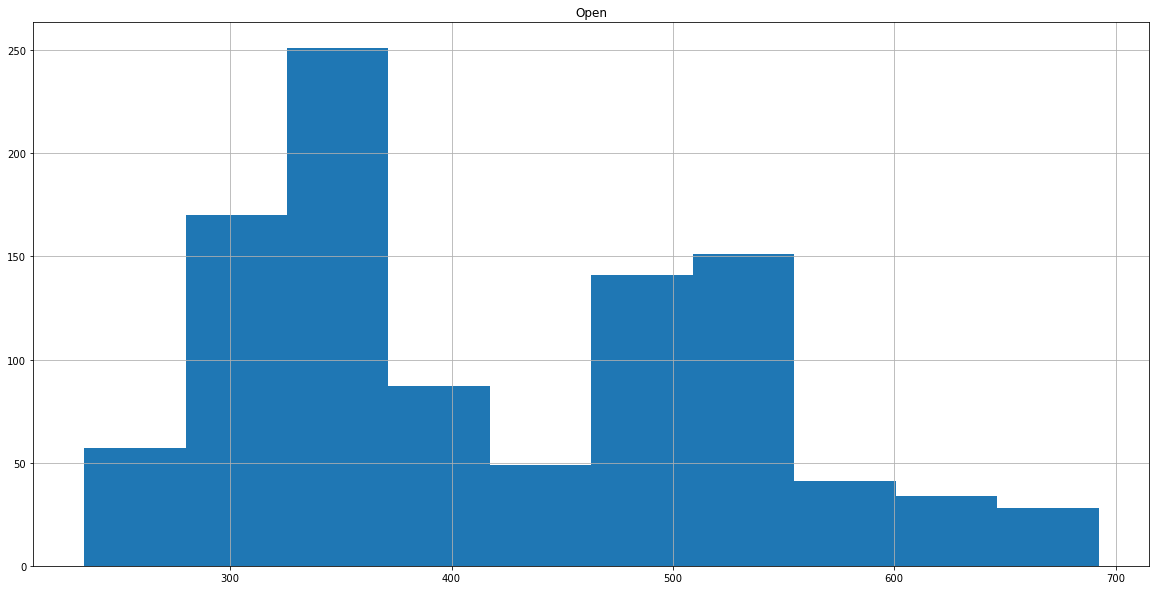

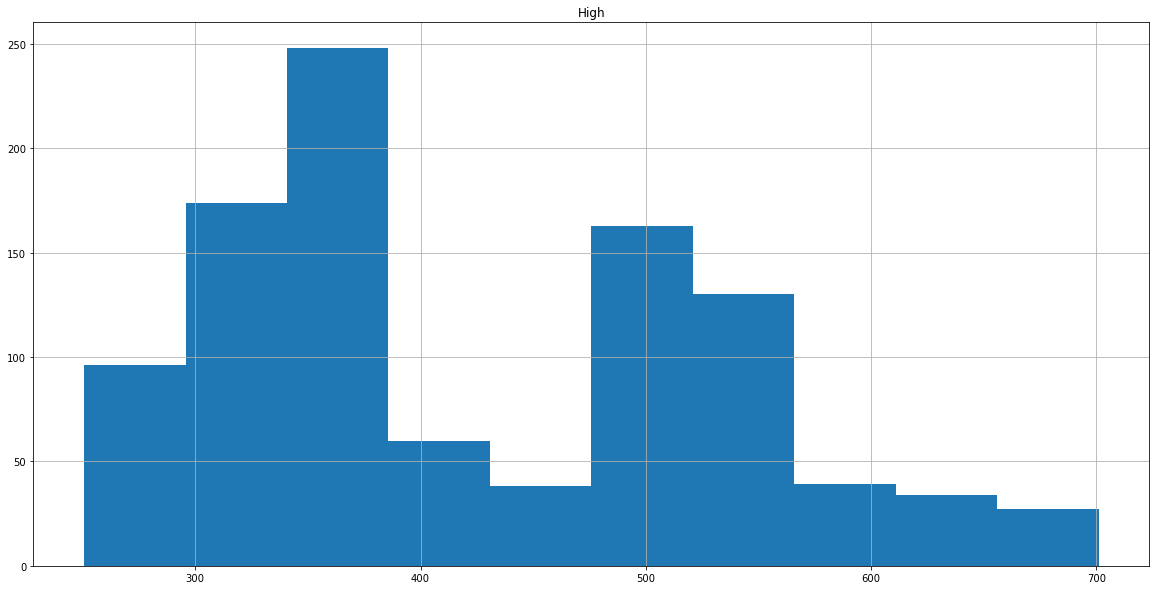

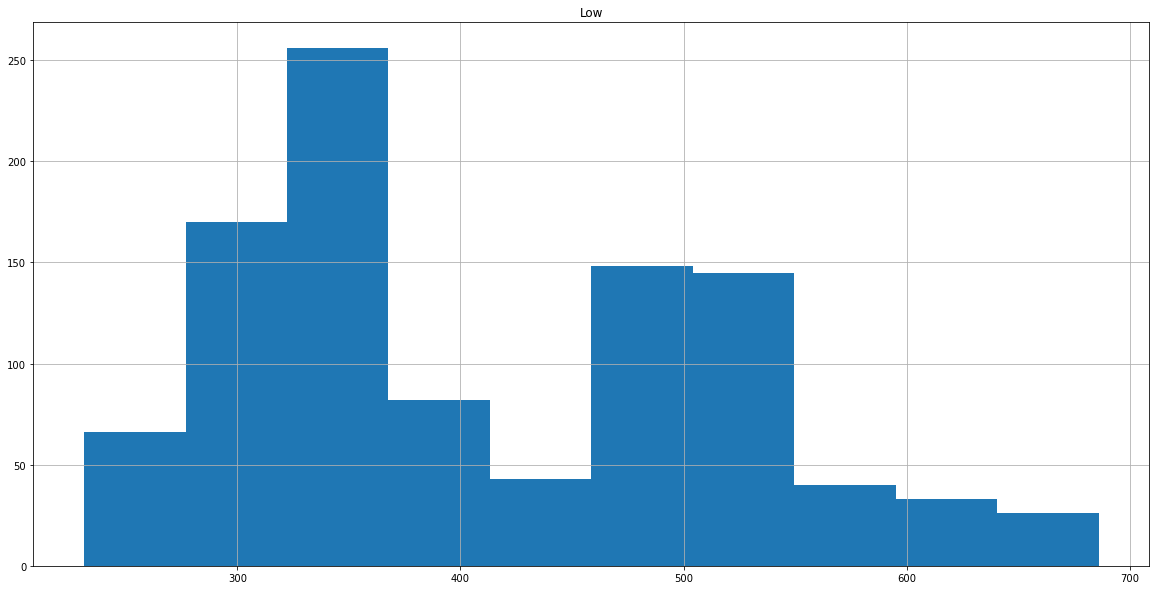

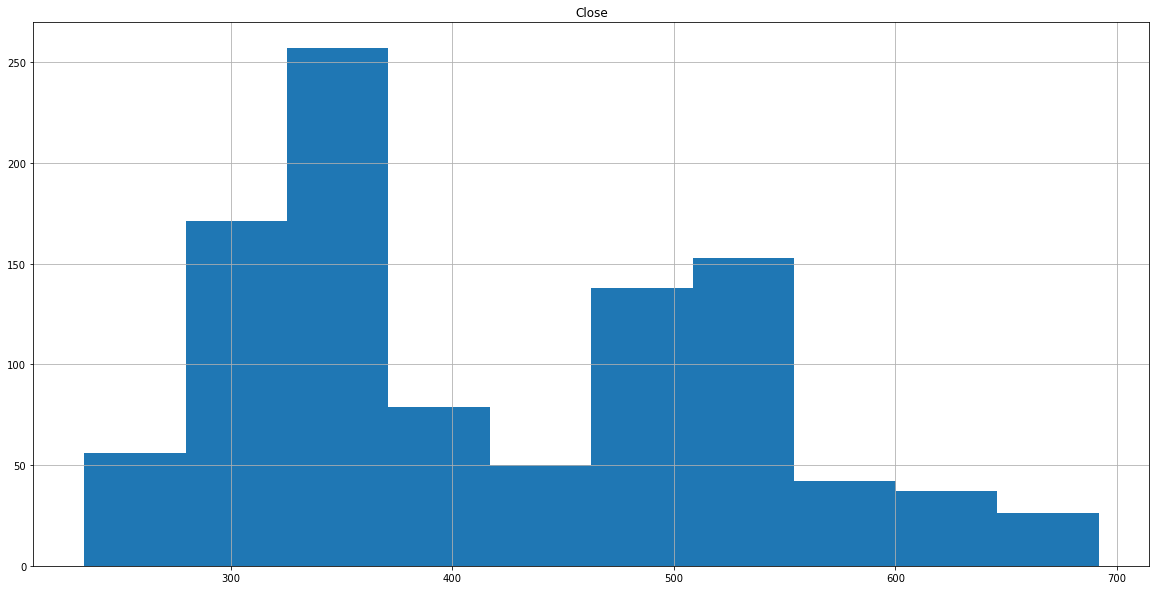

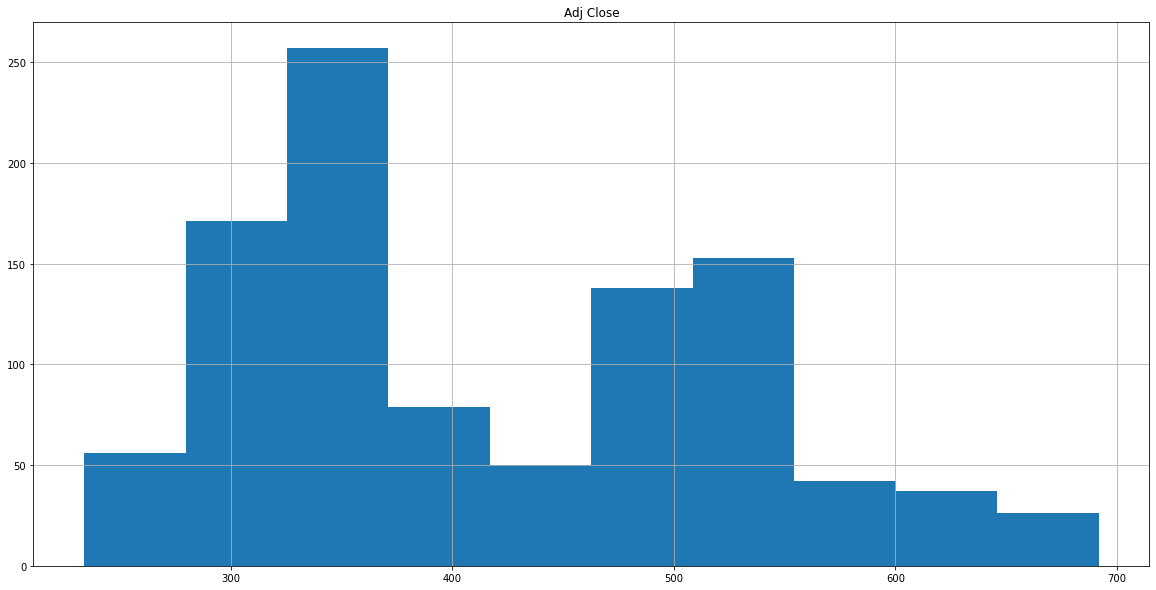

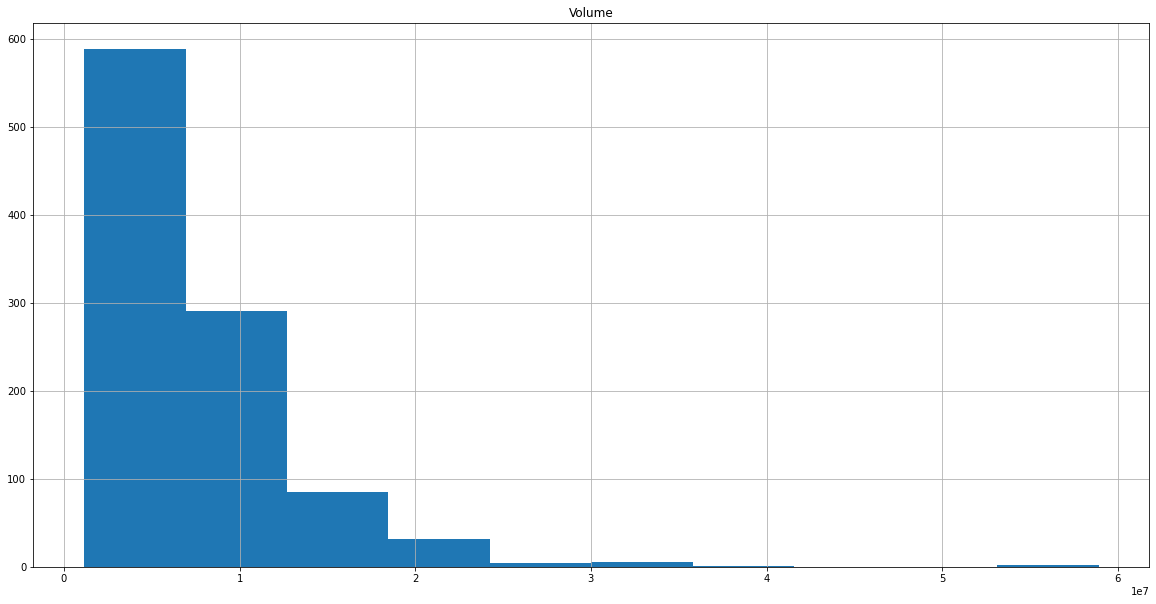

In [415]:
for column in netflix_stock_prices.columns:
    try:      
        netflix_stock_prices[column] = pd.to_numeric(netflix_stock_prices[column]) 
        netflix_stock_prices.hist(column)
    except ValueError:
        print(f"The column {column} can not be represented as a histogram")

_[The second part of this brief data exploration is to figure out which features are categorical. The reason I need to do this is so that I can figure out which features to one-hot encode during the next phase(i.e. when we are preprocessing the data). This part of the analysis clearly shows that the features Open, High, Low, Close, Adj. Close, and Volume are not categorical variables because they don't take on a finite set of values. They can take on an infinite range of values. Hence, by definition, they cannot be considered categorical. The "Date" column is not really considered a variable here for the sake of analysis because its more so used to identify each data sample. Hence, I am not really considering it as a "variable" for analysis. Hence, given the aforementioned statements, it is clear that there are no categorical variables. ]_

Text(0.5, 1.0, 'Netflix Inc.')

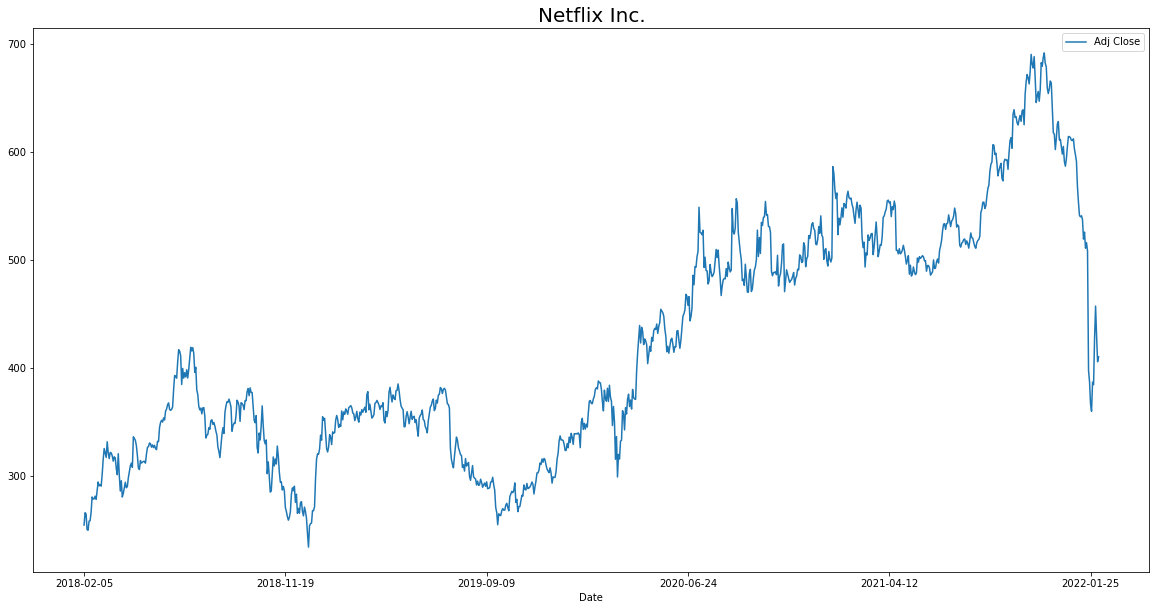

In [416]:
netflix_stock_prices.set_index("Date", inplace = True) #set date as the index
netflix_stock_prices[['Adj Close']].plot(figsize= (20, 10)) #Plot Stock Values for Netflix Over period from Feb 2018 to Feb 2022
plt.title("Netflix Inc.", fontsize = 20) #Title the Plot Netflix Inc. 

_[Since the Date variable is used to identify each data sample, I set the index of this dataframe to be the "Date" variable. I plotted the Adj.Close column of the dataframe on a graph to see the trends in Netflix Stock Price from Feb 2018 to Feb 2022. Clearly, we can see a general upwards trend over the past 5 years but quite few short-term fluctuations in the stock price. Another interesting thing to note is that, around January of 2022, there has been a sharp drop in the stock price of Netflix. This is, most probably, due to the fact that Netlix has been losing approximately 200,000 subscribers in the first three months of 2022 (i.e. first economic quarter)(https://www.theguardian.com/media/2022/apr/20/netflix-shares-fall-losing-subscribers). ]_

# **2. Pre-processing of Dataset**

In [417]:
def is_logical(feature, value):
    if (value == np.nan or value == None):
        return False
    if (feature != "Volume"):
        return value >= 125 and value <= 750
    return value >= 1000000 and value <= 60000000 

count = 0
for column in netflix_stock_prices:
    columnSeries = netflix_stock_prices[column] #retrieve column from data frame
    li = [] #list to store newly created column
    
    #Go through all values in the column. If the value is logically consistent, append this value to the list
    #If the value is not logically consistent, append NaN to the list
    for value in columnSeries:
        if (is_logical(column, value)):
            li.append(value)
        else:
            li.append(np.nan)
            count = count + 1
    
    #Convert li to pandas Series and store this in the column
    if (np.nan in li):
        netflix_stock_prices[column] = pd.Series(li)   

netflix_stock_prices.interpolate(inplace = True) #fill in NaN values via interpolation



_[After looking up the Netflix Stock Prices from Feb 2018 to Feb 2022, the lowest the stock price ever got to was roughly 175 and the highest it ever got to was 700. Hence, to set a reasonable buffer, I made the lower bound for price 125 and the higher bound 750. For volume, the lowest volume for stock prices from Feb 2018 to Feb 2022 was roughly 1.7 million and the highest was around 50 million. Hence, for a reasonable buffer, I set the lower bound for volume to be 1 million and the upper bound to be 60 million. Once I wrote the function to determine whether a value for particular feature is logically valid, I went through the dataframe to validate each and every value. Invalid values were simply repalced with NaN. After I finished validating values, I replaced any NaN values via simple interpolation. Essentially if there were NaN values between non-NaN values, the function interpolate() draws a line between the NaN values and replaces the NaN values with values on this line.  ]_

# **3. Feature Engineering / Feature Learning**

In [418]:
#Calculate Continuously Compounded Return on Asset Price 
closing_prices = netflix_stock_prices["Adj Close"].to_list()
returns = np.log(closing_prices[1: ]) - np.log(closing_prices[: -1])
returns = np.insert(returns, 0, np.nan)

window_size = 100
netflix_stock_prices["Continuously Compounded Returns"] = pd.Series(returns, index = netflix_stock_prices.index)
netflix_stock_prices["Expected Value"] = netflix_stock_prices["Continuously Compounded Returns"].rolling(window= window_size, closed = "left").mean()
netflix_stock_prices["Variance"] = netflix_stock_prices["Continuously Compounded Returns"].rolling(window= window_size, closed = "left").var()
netflix_stock_prices["Skew"] = netflix_stock_prices["Continuously Compounded Returns"].rolling(window= window_size, closed = "left").skew()
netflix_stock_prices["Kurtosis"] = netflix_stock_prices["Continuously Compounded Returns"].rolling(window= window_size, closed = "left").kurt()


X = netflix_stock_prices[["Expected Value", "Variance", "Skew", "Kurtosis"]].to_numpy()
X = X[window_size + 1: ]
Y = netflix_stock_prices[["Continuously Compounded Returns"]].to_numpy()
Y = Y[window_size + 1: ]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=104, test_size=0.20, shuffle=True) #split data into train/test

# use the fit_transform API to simultaneously compute mean and center data
datascaler = sklpp.StandardScaler()
X_train = datascaler.fit_transform(X_train)
X_test = datascaler.transform(X_test)

#solve PCA problem to capture at least 90% energy
pca = skldecomp.PCA(n_components = 0.90, svd_solver = 'full')  
X_train = pca.inverse_transform(pca.fit_transform(X_train))
X_test = pca.inverse_transform(pca.transform(X_test))



The goal of making a stock market machine learning system is to forecast future returns(https://web-static.stern.nyu.edu/rengle/EnglePattonQF.pdf). According to my research, financial modeling must take into account the volatilty of a particular stock or options. According to a research paper published by Robert F Engle and Andrew J Patton, a "central requirement in almost all financial applications" is that a financial model should be able to forecast volatility(https://web-static.stern.nyu.edu/rengle/EnglePattonQF.pdf). Forecasts of a stock price and its future volatility is used in financial domains such as "risk management, derivative pricing and hedging, market making, market timing, portfolio selection and many other financial activities"(https://web-static.stern.nyu.edu/rengle/EnglePattonQF.pdf). 

# **4. Processing The Dataset Via Machine Learning**

In [419]:
model1 = LinearRegression().fit(X_train, Y_train)

# **5. Comparative Analysis**

Error on Test Data: [1.88447795]


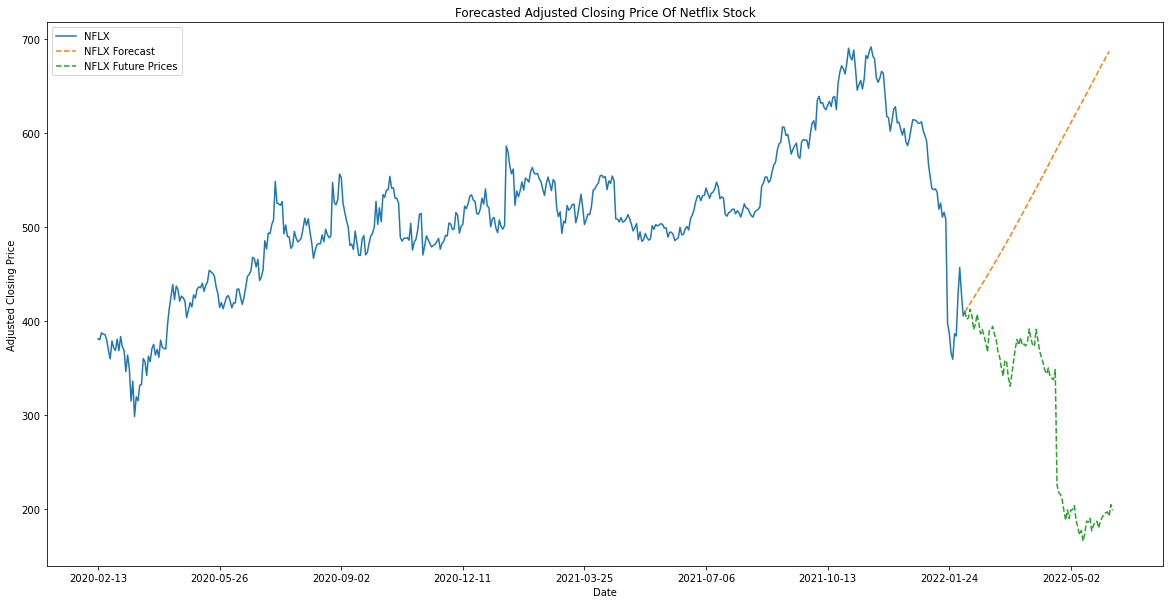

In [420]:
future_stock_prices = pd.read_csv("NFLX_Future.csv")
future_stock_prices.set_index("Date", inplace = True)
future_stock_prices = future_stock_prices.loc[netflix_stock_prices.index[-1]: ]

N, P = X_test.shape
prediction = model1.predict(X_test)
error = sum([((actual_label - predicted_label) / actual_label) ** 2 for predicted_label, actual_label in zip(prediction, Y_test)]) / N
print(f"Error on Test Data: {error}")

data_size = netflix_stock_prices.shape
num_rows = len(future_stock_prices)
previous_two_weeks = netflix_stock_prices["Continuously Compounded Returns"].to_list()
previous_two_weeks = np.array(previous_two_weeks[-1 * window_size:]).reshape(window_size, 1)
feature_array = np.zeros((1, 4))
forecasts = np.zeros((num_rows + 1, 1))
forecasts[0] = np.array([closing_prices[-1]])

for day in range(num_rows):
    
    feature_array[0][0] = np.mean(previous_two_weeks)
    feature_array[0][1] = np.var(previous_two_weeks)
    feature_array[0][2] = sps.skew(previous_two_weeks)
    feature_array[0][3] = sps.kurtosis(previous_two_weeks)
    
    feature_array = datascaler.transform(feature_array)
    feature_array = pca.inverse_transform(pca.transform(feature_array))
    asset_return = model1.predict(feature_array)
    stock_gain = np.exp(asset_return)
    forecasts[day + 1] = forecasts[day] *  stock_gain[0]
    previous_two_weeks = np.concatenate((previous_two_weeks[1: ], asset_return), axis = 0)

adjusted_closing_prices = netflix_stock_prices[['Adj Close']].tail(500)
future_stock_predictions = pd.DataFrame({"Forecasts": forecasts.flatten()}, index=pd.date_range(start= netflix_stock_prices.index[-1], periods=len(forecasts), freq="B", inclusive = "both").format(formatter=lambda x: x.strftime('%Y-%m-%d')))

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
ax.set_title("Forecasted Adjusted Closing Price Of Netflix Stock")
ax.set_xlabel("Date")
ax.set_ylabel("Adjusted Closing Price")

ax.plot(adjusted_closing_prices['Adj Close'], label = "NFLX")
ax.plot(future_stock_predictions["Forecasts"], linestyle='dashed', label = "NFLX Forecast")
ax.plot(future_stock_prices['Adj Close'], linestyle='dashed', label = "NFLX Future Prices")
ax.xaxis.set_major_locator(mticker.IndexLocator( base = 70, offset = 0))
ax.legend()

plt.show()


# **6. Discussion of Ethical Issues**

_[In recent years, the predictive capabilities of Machine Learning models have transformed the financial industry. In an attempt to make more prudent investment decisions, Many quantitative trading firms have begun adopting ML models to make stock price forecasts. However, it is essential that the ethical component of using ML-based system in stock forecasting is carefully evaluated, especially due to the rise of stock fraud, Ponzi Schemes, Insider Trading, etc in recent years. 

To begin the disussion on ethical aspects of Machine Learning Stock Prediction Systems, I will provide an outline of the general goal of investing/quantiative trading and speak more closely on the ethical aspects pertaining to each goal. 

The first major goal of investing/quantiative trading is Reasoning/Transparency. Especially in today's world, it is a well known fact that ML, stock forecasting systems are some of the most accurate systems when it comes to stock prediction. However, these models never provide investors with a rational basis for why a particular investment outranks its alternatives. In fact, "the most commonly used Neural Network for prediction is notoriously known as 'black box'"(https://iopscience.iop.org/article/10.1149/10701.0137ecst/pdf). When making investment decisions for their portfolios, investors will, most likely, feel hestitant to simply rely upon a Neural Network to make their investment decisions for them in a black box fashion. Any prudent investor, given that they are investing their own hard-earned money, will want to thoroughly understand the basis behind an investment decisions. Most Neural Networks used for stock predictions rarely give investors that insight. These Neural Networks almost never tell investors how it is making the prediction about a particular stock's value. We are not given information into what factors are being taken into account. Hence, it is understandable why investors won't be too confident in ceding their decision-making capabilities to a black-box model where we don't have an understanding of what this model is actually doing. How does ethics play into this? Well, ML engineers must remember that these Neural Networks are being used to invest real people's money. Failure to provide information into how investment decisions are being made behind the hood leaves investors completely in the dark about how their money is being invested in the market. Subsequently, this may lead to large economic loss for investors as they are largely uncertain how to make rational investment decisions, in absence of the information regarding the formulations used by the Neural Network in making its predictions. Hence, when investors blindly trust the ML models, and the stock market fluctuates wildly(i.e. as it always does), these investors will stand to lose a significant portion of their fortune. This will have large ramifications.  

The second major goal in investing/quantiative trading is Bias. Analysis, when making investment decisions, avoid bias in making investment decisions, rather basing investment decisions upon a holistic review of numerous factors. The same practice must be followed. When Machine Learning models recieve heavily biased input data, they will produce poor predictions. In the financial industry, this means that the input data to Stock Prediction Machine Learning Models should not solely be confined to financial statements of a particular firm(i.e. biased data!). How does ethics play into this? Well, let's consider the scenario where the input data to our Machine Learning Model is heavily biased. Let's say we want to predict the stock price of Apple(i.e. ticker symbol of AAPL) and the data receive is only financial statements of Apple. This data could be heavily biased as the firm itself have it in their best interests to see a rise in their own stock price. Hence, our model could end up predicting a stock price that is very high for Apple, lull most investors into a false sense of promise by incentivizing them to invest in Apple, and, when the market fluctuates, these investors will end up losing quite a lot of money. Hence, avoiding bias in stock prediction machine learning models is essential to avoid the scenario of outlandish model predictions and investors subsequently losing money due to over-optimism

The third major goal in investing/quantitative trading is Accountability. By far, the most important thing when it comes to quantiative trading is that the money invested is the hard-earned money of an investor(i.e. in most cases, an average person). Most Stock Prediction Machine Learning systems don't heed to the importance of accountability for capital invested. Some ML Systems, after observing strong results on a given training data set, are simply put into the production based on the confidence of the engineers who built the system. ML Engineers must view these ML systems, in production, as not just running on "test data" but affecting actual investors. Due to the fact that these ML systems are put into production to help investors make prudent investment decisions, it is important that ML Engineers take into account the effects these models' predictions can have on investors' capital. This is essentially how ethics plays a role. It is simply unethical for an ML Engineer to deploy an ML system based on their own confidence/pride in the system's accuracy rather than a holistic assessment of how the ML System will guide investors to make rational investment decisions for their capital. ]_

# **7. Bibliography**

1. https://iopscience.iop.org/article/10.1149/10701.0137ecst/pdf
2. https://www.theguardian.com/media/2022/apr/20/netflix-shares-fall-losing-subscribers
3. https://web-static.stern.nyu.edu/rengle/EnglePattonQF.pdf

